In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import pickle

In [2]:
cities=pd.read_csv("in.csv")
cities

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Delhi,28.6600,77.2300,India,IN,Delhi,admin,29617000.0,16753235.0
1,Mumbai,18.9667,72.8333,India,IN,Mahārāshtra,admin,23355000.0,12478447.0
2,Kolkāta,22.5411,88.3378,India,IN,West Bengal,admin,17560000.0,4496694.0
3,Bangalore,12.9699,77.5980,India,IN,Karnātaka,admin,13707000.0,8443675.0
4,Chennai,13.0825,80.2750,India,IN,Tamil Nādu,admin,11324000.0,6727000.0
...,...,...,...,...,...,...,...,...,...
402,Curchorem,15.2500,74.1000,India,IN,Goa,NaN,22730.0,22730.0
403,Kavaratti,10.5626,72.6369,India,IN,Lakshadweep,admin,10688.0,10688.0
404,Panchkula,30.6915,76.8537,India,IN,Haryāna,minor,NaN,NaN
405,Kagaznāgār,19.3316,79.4661,India,IN,Telangana,minor,NaN,NaN


In [3]:
cities['city']=cities['city'].str.lower()
cities

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,delhi,28.6600,77.2300,India,IN,Delhi,admin,29617000.0,16753235.0
1,mumbai,18.9667,72.8333,India,IN,Mahārāshtra,admin,23355000.0,12478447.0
2,kolkāta,22.5411,88.3378,India,IN,West Bengal,admin,17560000.0,4496694.0
3,bangalore,12.9699,77.5980,India,IN,Karnātaka,admin,13707000.0,8443675.0
4,chennai,13.0825,80.2750,India,IN,Tamil Nādu,admin,11324000.0,6727000.0
...,...,...,...,...,...,...,...,...,...
402,curchorem,15.2500,74.1000,India,IN,Goa,NaN,22730.0,22730.0
403,kavaratti,10.5626,72.6369,India,IN,Lakshadweep,admin,10688.0,10688.0
404,panchkula,30.6915,76.8537,India,IN,Haryāna,minor,NaN,NaN
405,kagaznāgār,19.3316,79.4661,India,IN,Telangana,minor,NaN,NaN


In [4]:
api="550e7b96678d45b05121fdf5f6afb8c3"
city=input("enter city name: ")
lat=cities.loc[cities['city']==city,'lat']
long=cities.loc[cities['city']==city,'lng']
lat.values[0],long.values[0]

enter city name: delhi


(28.66, 77.23)

In [5]:
url=f"https://api.openweathermap.org/data/2.5/onecall?lat={lat.values[0]}&lon={long.values[0]}&appid={api}&units=metric"
data=requests.get(url).json()
data

{'lat': 28.66,
 'lon': 77.23,
 'timezone': 'Asia/Kolkata',
 'timezone_offset': 19800,
 'current': {'dt': 1642925869,
  'sunrise': 1642902194,
  'sunset': 1642940526,
  'temp': 15.06,
  'feels_like': 15.08,
  'pressure': 1010,
  'humidity': 94,
  'dew_point': 14.1,
  'uvi': 2.61,
  'clouds': 75,
  'visibility': 800,
  'wind_speed': 3.6,
  'wind_deg': 280,
  'weather': [{'id': 741,
    'main': 'Fog',
    'description': 'fog',
    'icon': '50d'}]},
 'minutely': [{'dt': 1642925880, 'precipitation': 0},
  {'dt': 1642925940, 'precipitation': 0},
  {'dt': 1642926000, 'precipitation': 0},
  {'dt': 1642926060, 'precipitation': 0},
  {'dt': 1642926120, 'precipitation': 0},
  {'dt': 1642926180, 'precipitation': 0},
  {'dt': 1642926240, 'precipitation': 0},
  {'dt': 1642926300, 'precipitation': 0},
  {'dt': 1642926360, 'precipitation': 0},
  {'dt': 1642926420, 'precipitation': 0},
  {'dt': 1642926480, 'precipitation': 0},
  {'dt': 1642926540, 'precipitation': 0},
  {'dt': 1642926600, 'precipitatio

In [6]:
df=pd.DataFrame(columns=['pressure','humidity','dew_point','wind_speed'])
actual=pd.DataFrame(columns=['predictions'])
df

,pressure,humidity,dew_point,wind_speed


In [76]:
for i in range(0,48):
#     df.loc[i,'date']=data['hourly'][i]['dt']
    df.loc[i,'pressure']=data['hourly'][i]['pressure']
    df.loc[i,'humidity']=data['hourly'][i]['humidity']
    df.loc[i,'dew_point']=data['hourly'][i]['dew_point']
#     df.loc[i,'uvi']=data['hourly'][i]['uvi']
#     df.loc[i,'clouds']=data['hourly'][i]['clouds']
#     df.loc[i,'visibility']=data['hourly'][i]['visibility']
    df.loc[i,'wind_speed']=data['hourly'][i]['wind_speed']
    df.loc[i,'wind_deg']=data['hourly'][i]['wind_deg']
#     df.loc[i,'wind_gust']=data['hourly'][i]['wind_gust']
    actual.loc[i,'predictions']=data['hourly'][i]['temp']

In [77]:
# wind speed by defalut is in m/s
df['wind_speed']=df['wind_speed']*3.6
df

,pressure,humidity,dew_point,wind_speed,wind_deg
0,1012,92,12.22,8.100,136.0
1,1012,100,13.06,8.100,153.0
2,1012,92,12.15,9.540,106.0
3,1011,85,11.22,11.808,77.0
4,1011,79,10.04,10.836,118.0
5,1010,70,8.71,8.748,168.0
6,1009,65,7.75,10.440,106.0
7,1008,68,8.10,14.292,116.0
8,1009,82,9.86,9.828,85.0
9,1009,84,10.15,15.264,76.0


In [9]:
df['wind_speed']=df['wind_speed'].astype(float).round(decimals=0)
df['dew_point']=df['dew_point'].astype(float).round(decimals=0)

In [67]:
df_delhi=pd.read_csv("delhi.csv")
df_delhi.columns
df_delhi

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2009-01-01 00:00:00,22,9,0.0,8.7,4,1,31,10:11 AM,09:57 PM,...,14,19,0,50,0.0,1016,10,10,331,12
1,2009-01-01 01:00:00,22,9,0.0,8.7,4,1,31,10:11 AM,09:57 PM,...,13,21,0,51,0.0,1016,10,10,329,13
2,2009-01-01 02:00:00,22,9,0.0,8.7,4,1,31,10:11 AM,09:57 PM,...,12,22,0,52,0.0,1016,9,10,327,13
3,2009-01-01 03:00:00,22,9,0.0,8.7,4,1,31,10:11 AM,09:57 PM,...,11,23,0,54,0.0,1016,9,10,326,13
4,2009-01-01 04:00:00,22,9,0.0,8.7,4,1,31,10:11 AM,09:57 PM,...,11,21,2,52,0.0,1016,9,10,318,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96427,2020-01-01 19:00:00,19,10,0.0,8.7,5,1,37,11:28 AM,11:12 PM,...,17,11,10,39,0.0,1020,17,10,96,9
96428,2020-01-01 20:00:00,19,10,0.0,8.7,5,1,37,11:28 AM,11:12 PM,...,16,11,9,40,0.0,1021,16,10,97,8
96429,2020-01-01 21:00:00,19,10,0.0,8.7,5,1,37,11:28 AM,11:12 PM,...,16,12,8,41,0.0,1021,16,10,98,8
96430,2020-01-01 22:00:00,19,10,0.0,8.7,5,1,37,11:28 AM,11:12 PM,...,15,11,8,42,0.0,1021,15,10,96,8


In [68]:
df_delhi.isnull().any()

date_time            False
maxtempC             False
mintempC             False
totalSnow_cm         False
sunHour              False
uvIndex              False
uvIndex.1            False
moon_illumination    False
moonrise             False
moonset              False
sunrise              False
sunset               False
DewPointC            False
FeelsLikeC           False
HeatIndexC           False
WindChillC           False
WindGustKmph         False
cloudcover           False
humidity             False
precipMM             False
pressure             False
tempC                False
visibility           False
winddirDegree        False
windspeedKmph        False
dtype: bool

In [69]:
x=df_delhi[['pressure','humidity','DewPointC','windspeedKmph','winddirDegree']]
y=df_delhi['tempC']

In [70]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [71]:
model=LinearRegression()
model.fit(X_train.values,y_train)

LinearRegression()

In [72]:
model.score(X_test.values,y_test)*100

88.28029848598683

In [74]:
model1=RandomForestRegressor(max_depth=10,n_estimators=100,random_state=0)
model1.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, random_state=0)

In [75]:
model1.score(X_test,y_test)*100

96.02327197383927

In [118]:
final1=pd.DataFrame(columns=['actual','pred','diff'])
final1['actual']=y_test
final1['pred']=model1.predict(X_test)
final1['diff']=final1['actual']-final1['pred']
final1

,actual,pred,diff
46970,29,28.759682,0.240318
4608,31,31.241721,-0.241721
55396,28,28.518536,-0.518536
95624,22,18.915272,3.084728
60071,23,21.847530,1.152470
...,...,...,...
10362,20,20.176585,-0.176585
15859,22,24.458851,-2.458851
79106,11,13.639734,-2.639734
65425,33,35.558480,-2.558480


In [20]:
pred=model1.predict(df)
pred=pred.reshape(1,48)

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- dew_point
- wind_speed
Feature names seen at fit time, yet now missing:
- DewPointC
- windspeedKmph

  warnings.warn(message, FutureWarning)


In [119]:
model1.score(df,actual)

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- dew_point
- wind_speed
Feature names seen at fit time, yet now missing:
- DewPointC
- windspeedKmph

  warnings.warn(message, FutureWarning)


0.339907357262618

In [120]:
final=pd.DataFrame(columns=['actual','pred','diff'])
for i in range(0,48):
    final.loc[i,'actual']=actual['predictions'].values[i]
    final.loc[i,'pred']=pred[i]
final['diff']=final['actual']-final['pred']

In [121]:
final

,actual,pred,diff
0,10.06,8.225332,1.834668
1,9.06,8.225332,0.834668
2,9.9,8.581905,1.318095
3,10.59,8.217582,2.372418
4,11.14,8.30716,2.83284
5,11.54,8.215306,3.324694
6,11.89,9.15099,2.73901
7,11.67,8.493487,3.176513
8,11.44,7.578343,3.861657
9,11.28,6.620384,4.659616


In [79]:
with open('forecast','wb') as f:
    pickle.dump(model1,f)

In [127]:
import datetime
for i in range(0,48):
    final.loc[i,'date']=data['hourly'][i]['dt']
    time=final.loc[i,'date']
    final.loc[i,'date']=datetime.datetime.fromtimestamp(int(time)).strftime('%Y-%m-%d %H:%M:%S')

In [128]:
graph=pd.DataFrame(columns=['time','temp'])
for i in range(0,48):
    graph.loc[i,'time']=final['date'].str.split(" ")[i][1]
    graph.loc[i,'temp']=final['pred'][i]

In [129]:
final

,actual,pred,diff,date
0,10.06,8.225332,1.834668,2022-01-18 21:30:00
1,9.06,8.225332,0.834668,2022-01-18 22:30:00
2,9.9,8.581905,1.318095,2022-01-18 23:30:00
3,10.59,8.217582,2.372418,2022-01-19 00:30:00
4,11.14,8.30716,2.83284,2022-01-19 01:30:00
5,11.54,8.215306,3.324694,2022-01-19 02:30:00
6,11.89,9.15099,2.73901,2022-01-19 03:30:00
7,11.67,8.493487,3.176513,2022-01-19 04:30:00
8,11.44,7.578343,3.861657,2022-01-19 05:30:00
9,11.28,6.620384,4.659616,2022-01-19 06:30:00


In [130]:
for i in range(0,48):
    graph.loc[i,'time']=graph['time'].str.split(":")[i][0]+":"+graph['time'].str.split(":")[i][1]

In [131]:
graph

,time,temp
0,21:30,8.225332
1,22:30,8.225332
2,23:30,8.581905
3,00:30,8.217582
4,01:30,8.30716
5,02:30,8.215306
6,03:30,9.15099
7,04:30,8.493487
8,05:30,7.578343
9,06:30,6.620384


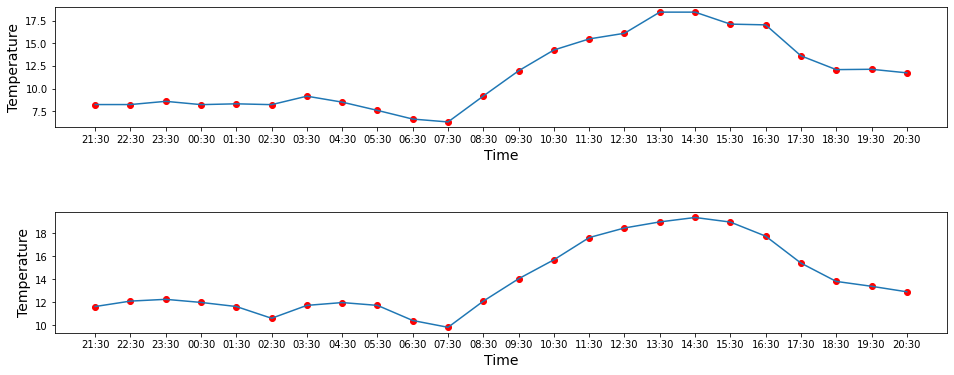

In [132]:
fig, ax = plt.subplots(2)
fig.set_figheight(6)
fig.set_figwidth(16)
ax[0].scatter(graph['time'][0:24],graph['temp'][0:24],marker='o',c='r')
ax[0].set_xlabel("Time",size=14)
ax[0].plot(graph['time'][0:24],graph['temp'][0:24])
ax[0].set_ylabel("Temperature",size=14)
ax[1].scatter(graph['time'][24:48],graph['temp'][24:48],marker='o',c='r')
ax[1].set_xlabel("Time",size=14)
ax[1].set_ylabel("Temperature",size=14)
ax[1].plot(graph['time'][24:48],graph['temp'][24:48])
plt.subplots_adjust(hspace=0.7)
plt.show()

## Kanpur model

In [59]:
kanpur_df=pd.read_csv("kanpur.csv")
kanpur_df

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2009-01-01 00:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,...,11,21,17,50,0.0,1015,11,10,320,10
1,2009-01-01 01:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,...,12,22,11,52,0.0,1015,11,10,315,11
2,2009-01-01 02:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,...,12,23,6,55,0.0,1015,11,10,310,11
3,2009-01-01 03:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,...,12,23,0,57,0.0,1015,10,10,304,12
4,2009-01-01 04:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,...,14,19,0,54,0.0,1016,11,10,302,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96427,2020-01-01 19:00:00,15,11,0.0,7.1,4,1,37,11:13 AM,11:00 PM,...,13,21,53,61,0.0,1019,13,8,74,11
96428,2020-01-01 20:00:00,15,11,0.0,7.1,4,1,37,11:13 AM,11:00 PM,...,12,22,39,61,0.0,1020,13,9,81,11
96429,2020-01-01 21:00:00,15,11,0.0,7.1,4,1,37,11:13 AM,11:00 PM,...,12,23,25,62,0.0,1020,13,10,88,11
96430,2020-01-01 22:00:00,15,11,0.0,7.1,4,1,37,11:13 AM,11:00 PM,...,12,21,26,63,0.0,1020,13,10,85,11


In [60]:
x=kanpur_df[['pressure','humidity','DewPointC','windspeedKmph','winddirDegree']]
y=kanpur_df['tempC']

In [61]:
x.isnull().any()

pressure         False
humidity         False
DewPointC        False
windspeedKmph    False
winddirDegree    False
dtype: bool

In [62]:
y.isnull().any()

False

In [82]:
x

,pressure,humidity,DewPointC,windspeedKmph
0,1015,50,2,10
1,1015,52,3,11
2,1015,55,4,11
3,1015,57,5,12
4,1016,54,5,11
...,...,...,...,...
96427,1019,61,6,11
96428,1020,61,6,11
96429,1020,62,6,11
96430,1020,63,6,11


In [83]:
y

0        11
1        11
2        11
3        10
4        11
         ..
96427    13
96428    13
96429    13
96430    13
96431    12
Name: tempC, Length: 96432, dtype: int64

In [63]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [64]:
model1=RandomForestRegressor(max_depth=10,n_estimators=100,random_state=0)
model1.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, random_state=0)

In [65]:
model1.score(X_test,y_test)

0.9737490385693464

In [66]:
with open('forecast_knp','wb') as f:
    pickle.dump(model1,f)

In [85]:
pred=model1.predict(df)
pred

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- dew_point
- wind_speed
Feature names seen at fit time, yet now missing:
- DewPointC
- windspeedKmph

  warnings.warn(message, FutureWarning)


array([ 8.2253318 ,  8.2253318 ,  8.58190489,  8.2175818 ,  8.30715976,
        8.21530626,  9.1509901 ,  8.49348719,  7.57834316,  6.62038367,
        6.30159216,  9.16891261, 11.96134581, 14.25976177, 15.48316833,
       16.10866114, 18.44741878, 18.44741878, 17.12147511, 17.0390978 ,
       13.61454676, 12.08868808, 12.12741042, 11.73332957, 11.6153743 ,
       12.08868808, 12.24300449, 11.97309401, 11.6153743 , 10.59124003,
       11.71559577, 11.96080406, 11.71559577, 10.39644896,  9.80377978,
       12.08617714, 14.0368439 , 15.69089356, 17.62700467, 18.46379056,
       18.99188105, 19.37758538, 18.97875532, 17.75129311, 15.40309087,
       13.80511669, 13.38061923, 12.89954122])

In [86]:
model1.score(df,actual)*100

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- dew_point
- wind_speed
Feature names seen at fit time, yet now missing:
- DewPointC
- windspeedKmph

  warnings.warn(message, FutureWarning)


71.28928354393463

In [87]:
actual

,predictions
0,9.95
1,10.04
2,9.95
3,9.84
4,9.55
5,9.21
6,9.05
7,8.78
8,8.5
9,8.52


In [88]:
final=pd.DataFrame(columns=['actual','pred','diff'])
for i in range(0,48):
    final.loc[i,'actual']=actual['predictions'].values[i]
    final.loc[i,'pred']=pred[i]
final['diff']=final['actual']-final['pred']

In [89]:
final

,actual,pred,diff
0,9.95,8.225332,1.724668
1,10.04,8.225332,1.814668
2,9.95,8.581905,1.368095
3,9.84,8.217582,1.622418
4,9.55,8.30716,1.24284
5,9.21,8.215306,0.994694
6,9.05,9.15099,-0.10099
7,8.78,8.493487,0.286513
8,8.5,7.578343,0.921657
9,8.52,6.620384,1.899616


In [90]:
import datetime
for i in range(0,48):
    final.loc[i,'date']=data['hourly'][i]['dt']
    time=final.loc[i,'date']
    final.loc[i,'date']=datetime.datetime.fromtimestamp(int(time)).strftime('%Y-%m-%d %H:%M:%S')

In [91]:
graph=pd.DataFrame(columns=['time','temp'])
for i in range(0,48):
    graph.loc[i,'time']=final['date'].str.split(" ")[i][1]
    graph.loc[i,'temp']=final['pred'][i]

In [92]:
graph

,time,temp
0,21:30:00,8.225332
1,22:30:00,8.225332
2,23:30:00,8.581905
3,00:30:00,8.217582
4,01:30:00,8.30716
5,02:30:00,8.215306
6,03:30:00,9.15099
7,04:30:00,8.493487
8,05:30:00,7.578343
9,06:30:00,6.620384


In [93]:
for i in range(0,48):
    graph.loc[i,'time']=graph['time'].str.split(":")[i][0]+":"+graph['time'].str.split(":")[i][1]

<ipython-input-94-de406798ecfe>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(graph['time'][0:24], rotation=45, ha='right')
<ipython-input-94-de406798ecfe>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(graph['time'][24:48], rotation=45, ha='right')


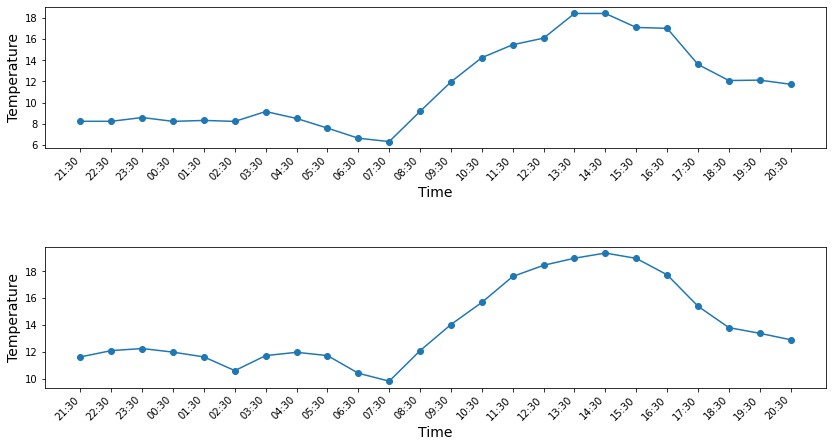

In [94]:
fig, ax = plt.subplots(2)
fig.set_figheight(7)
fig.set_figwidth(14)
ax[0].scatter(graph['time'][0:24],graph['temp'][0:24],marker='o')
ax[0].set_xlabel("Time",size=14)
ax[0].plot(graph['time'][0:24],graph['temp'][0:24])
ax[0].set_ylabel("Temperature",size=14)
ax[0].set_xticklabels(graph['time'][0:24], rotation=45, ha='right')
ax[1].scatter(graph['time'][24:48],graph['temp'][24:48],marker='o')
ax[1].set_xlabel("Time",size=14)
ax[1].set_ylabel("Temperature",size=14)
ax[1].plot(graph['time'][24:48],graph['temp'][24:48])
ax[1].set_xticklabels(graph['time'][24:48], rotation=45, ha='right')
plt.subplots_adjust(hspace=0.7)
plt.show()

In [66]:
graph

,time,temp
0,20:30,8.15129
1,21:30,8.117104
2,22:30,8.117104
3,23:30,8.581905
4,00:30,8.217582
5,01:30,8.30716
6,02:30,8.215306
7,03:30,9.15099
8,04:30,8.493487
9,05:30,7.578343


In [96]:
with open('forecast', 'rb') as f:
                model = pickle.load(f)

In [97]:
model.predict(df)

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- dew_point
- wind_speed
Feature names seen at fit time, yet now missing:
- DewPointC
- windspeedKmph

  warnings.warn(message, FutureWarning)


array([ 8.38865354,  8.38865354,  8.36471004,  8.3792253 ,  8.18884359,
        7.79829818,  7.40464107,  6.69040225,  7.03126609,  6.94410477,
        7.06081317,  9.10904564, 11.45108899, 14.31605499, 15.57168613,
       15.98551869, 17.9642478 , 17.93200107, 17.44648696, 16.24769257,
       13.26455174, 11.79934156, 11.28841153, 10.56289829,  9.8542354 ,
       11.79934156, 12.02460545, 11.08138976,  9.8542354 ,  9.75368205,
       10.54216892, 11.11221233, 10.56532207,  9.7850421 ,  8.97826013,
       11.32446111, 13.60608979, 15.64747955, 17.37504177, 18.46931911,
       18.97188564, 19.39022211, 19.66108941, 18.32860062, 16.07033405,
       13.91531795, 13.69184991, 13.35260558])

In [98]:
model1.predict(df)

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- dew_point
- wind_speed
Feature names seen at fit time, yet now missing:
- DewPointC
- windspeedKmph

  warnings.warn(message, FutureWarning)


array([ 8.2253318 ,  8.2253318 ,  8.58190489,  8.2175818 ,  8.30715976,
        8.21530626,  9.1509901 ,  8.49348719,  7.57834316,  6.62038367,
        6.30159216,  9.16891261, 11.96134581, 14.25976177, 15.48316833,
       16.10866114, 18.44741878, 18.44741878, 17.12147511, 17.0390978 ,
       13.61454676, 12.08868808, 12.12741042, 11.73332957, 11.6153743 ,
       12.08868808, 12.24300449, 11.97309401, 11.6153743 , 10.59124003,
       11.71559577, 11.96080406, 11.71559577, 10.39644896,  9.80377978,
       12.08617714, 14.0368439 , 15.69089356, 17.62700467, 18.46379056,
       18.99188105, 19.37758538, 18.97875532, 17.75129311, 15.40309087,
       13.80511669, 13.38061923, 12.89954122])

## Pune Model

In [51]:
pune_df=pd.read_csv('pune1.csv')  #kaggle 

In [52]:
x=pune_df[['pressure','humidity','DewPointC','windspeedKmph','winddirDegree']]
y=pune_df['tempC']

In [53]:
x.isnull().any()

pressure         False
humidity         False
DewPointC        False
windspeedKmph    False
winddirDegree    False
dtype: bool

In [54]:
y.isnull().any()

False

In [55]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [56]:
model_pune=RandomForestRegressor(max_depth=10,n_estimators=100,random_state=0)
model_pune.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, random_state=0)

In [57]:
model_pune.score(X_test,y_test)

0.96273069752583

In [58]:
with open('forecast_pune','wb') as f:
    pickle.dump(model_pune,f)

## Nagpur model

In [43]:
nagpur_df=pd.read_csv('nagpur1.csv')

In [44]:
x=nagpur_df[['pressure','humidity','DewPointC','windspeedKmph','winddirDegree']]
y=nagpur_df['tempC']

In [45]:
x.isnull().any()

pressure         False
humidity         False
DewPointC        False
windspeedKmph    False
winddirDegree    False
dtype: bool

In [46]:
y.isnull().any()

False

In [47]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [48]:
model_nagpur=RandomForestRegressor(max_depth=10,n_estimators=100,random_state=0)
model_nagpur.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, random_state=0)

In [49]:
model_nagpur.score(X_test,y_test)

0.9805601027960599

In [50]:
with open('forecast_nagpur','wb') as f:
    pickle.dump(model_nagpur,f)

## Bombay Model

In [35]:
bombay_df=pd.read_csv('bombay1.csv')

In [36]:
x=bombay_df[['pressure','humidity','DewPointC','windspeedKmph','winddirDegree']]
y=bombay_df['tempC']

In [37]:
x.isnull().any()

pressure         False
humidity         False
DewPointC        False
windspeedKmph    False
winddirDegree    False
dtype: bool

In [38]:
y.isnull().any()

False

In [39]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [40]:
model_bombay=RandomForestRegressor(max_depth=10,n_estimators=100,random_state=0)
model_bombay.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, random_state=0)

In [41]:
model_bombay.score(X_test,y_test)

0.8378995887923271

In [42]:
with open('forecast_bombay','wb') as f:
    pickle.dump(model_bombay,f)

## Bengaluru model

In [27]:
ben_df=pd.read_csv('bengaluru1.csv')

In [28]:
x=ben_df[['pressure','humidity','DewPointC','windspeedKmph','winddirDegree']]
y=ben_df['tempC']

In [29]:
x.isnull().any()

pressure         False
humidity         False
DewPointC        False
windspeedKmph    False
winddirDegree    False
dtype: bool

In [30]:
y.isnull().any()

False

In [31]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [32]:
model_ben=RandomForestRegressor(max_depth=10,n_estimators=100,random_state=0)
model_ben.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, random_state=0)

In [33]:
model_ben.score(X_test,y_test)

0.9710817890978101

In [34]:
with open('forecast_bengaluru','wb') as f:
    pickle.dump(model_ben,f)

## Jaipur model

In [19]:
jaipur_df=pd.read_csv('jaipur1.csv')

In [20]:
x=jaipur_df[['pressure','humidity','DewPointC','windspeedKmph','winddirDegree']]
y=jaipur_df['tempC']

In [21]:
x.isnull().any()

pressure         False
humidity         False
DewPointC        False
windspeedKmph    False
winddirDegree    False
dtype: bool

In [22]:
y.isnull().any()

False

In [23]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [24]:
model_jaipur=RandomForestRegressor(max_depth=10,n_estimators=100,random_state=0)
model_jaipur.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, random_state=0)

In [25]:
model_jaipur.score(X_test,y_test)

0.9816389414502874

In [26]:
with open('forecast_jaipur','wb') as f:
    pickle.dump(model_jaipur,f)

## Hyderabad Model

In [11]:
hyd_df=pd.read_csv('hyderabad1.csv')

In [12]:
x=hyd_df[['pressure','humidity','DewPointC','windspeedKmph','winddirDegree']]
y=hyd_df['tempC']

In [13]:
x.isnull().any()

pressure         False
humidity         False
DewPointC        False
windspeedKmph    False
winddirDegree    False
dtype: bool

In [14]:
y.isnull().any()

False

In [15]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [16]:
model_hyd=RandomForestRegressor(max_depth=10,n_estimators=100,random_state=0)
model_hyd.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, random_state=0)

In [17]:
model_hyd.score(X_test,y_test)

0.9677998399679318

In [18]:
with open('forecast_hyderabad','wb') as f:
    pickle.dump(model_hyd,f)